In [9]:
import pandas as pd
import glob

path = r'C:\Users\firda\Desktop\MA\Daten\\UnfallDaten' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = ';', index_col=None, header=0,encoding='ISO-8859-1')
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [10]:
data.head(5)

LfNr        Datum    Zeit WoTag  Straßenklasse  Straßennummer  \
0     1   01.01.2019   01:53    Di              5            NaN   
1     2   07.01.2019   07:50    Mo              5            NaN   
2     3   07.01.2019   19:20    Mo              3          866.0   
3     4   08.01.2019   18:30    Di              5            NaN   
4     5   09.01.2019   09:05    Mi              5            NaN   

            Gemeinde            Strasse  Tödlich verletzt  Schwer verletzt  \
0   Oldenburg (Oldb)      Bremer Straße                 0                0   
1   Oldenburg (Oldb)    Huntemannstraße                 0                0   
2   Oldenburg (Oldb)   Stedinger Straße                 0                0   
3   Oldenburg (Oldb)         Rauhehorst                 0                0   
4   Oldenburg (Oldb)        Donarstraße                 0                0   

   ...  Verursacher  Bet_02  Unfall-Typ   Koord.x    Koord.y  Leicht verletzt  \
0  ...           RF     PKW          EK  8.224273  53.130702              NaN   
1  ...          PKW      RF          EK  8.188205  53.139235              NaN   
2  ...           RF       -          SO  8.234091  53.137003              NaN   
3  ...          PKW      RF          EK  8.195803  53.158298              NaN   
4  ...           RF     PKW          RV  8.237245  53.149171              NaN   

   Anzahl Beteiligte  VU-Art  Unter-Typ  Fahrtrichtung  
0                NaN     NaN        NaN            NaN  
1                NaN     NaN        NaN            NaN  
2                NaN     NaN        NaN            NaN  
3                NaN     NaN        NaN            NaN  
4                NaN     NaN        NaN            NaN  

[5 rows x 45 columns]

In [11]:
data.columns

Index(['LfNr', 'Datum', 'Zeit', 'WoTag', 'Straßenklasse', 'Straßennummer',
       'Gemeinde', 'Strasse', 'Tödlich verletzt', 'Schwer verletzt',
       'Leichtverletzt', 'Anzahl der Beteiligten', 'VU-ArtArt',
       'Charakteristik1 VU-Stelle', 'Charakteristik2 VU-Stelle',
       'Besonderheit1 VU-Stelle', 'Besonderheit2 VU-Stelle',
       'Besonderheit3 VU-Stelle', 'LZA', 'VU-Kategorie', 'VU-Typ', 'UnterTyp',
       'VU-Ursache Verursacher', '2.VU-Ursache Verursacher',
       '3.VU-Ursache Verursacher', 'VU-Ursache 2. Beteiligter',
       '2.VU-Ursache 2. Beteiligter', 'Allgmeine Ursache Verursacher',
       'Verkehrsbeteiligung Verursacher', 'Verkehrsbeteiligung 2. Beteiligter',
       'Jahr', 'Monat', 'Tag', 'Lichtverhältnisse', 'Straßenzustand',
       'Verursacher', 'Bet_02', 'Unfall-Typ', 'Koord.x', 'Koord.y',
       'Leicht verletzt', 'Anzahl Beteiligte', 'VU-Art', 'Unter-Typ',
       'Fahrtrichtung'],
      dtype='object')

In [18]:
data=data.fillna(0)

##### Anzahl der Unfälle

In [19]:
data.shape[0]

1493

##### Anzahl der tödliche Unfälle

In [20]:
count=0
for i in range(len(data)):
    if(data['Tödlich verletzt'][i]==0):
        pass
    else:
        count=count+data['Tödlich verletzt'][i]
print(count)

3


##### Anzahl der schwer verletzte Unfälle

In [21]:
count=0
for i in range(len(data)):
    if(data['Schwer verletzt'][i]==0):
        pass
    else:
        count=count+data['Schwer verletzt'][i]
print(count)

126


##### Anzahl der leicht verletzte Unfälle

In [25]:
count=0
for i in range(len(data)):
    if(data['Leicht verletzt'][i]!=0 or data['Leichtverletzt'][i]!=0):
        count=int(count+data['Leicht verletzt'][i]+data['Leichtverletzt'][i])
    else:
        pass
print(count)

1041


#### Anzahl der Unfälle, wo einer verursacher ist ein Radfahrer

In [26]:
count=0
for i in range(len(data)):
    if(data['Verursacher'][i]==' RF' or data['Bet_02'][i]==' RF' ):
        count=count+1
    else:
        pass
print(count)

1487


#### Anzahl der Unfälle, wo beide verursacher sind Radfahrer

In [27]:
count=0
for i in range(len(data)):
    if(data['Verursacher'][i]==' RF' and data['Bet_02'][i]==' RF' ):
        count=count+1
    else:
        pass
print(count)

173


In [28]:
data['Datum'] = pd.to_datetime(data['Datum'], format=" %d.%m.%Y")

In [29]:
data['Datum'].min()

Timestamp('2019-01-01 00:00:00')

In [30]:
data['Datum'].max()

Timestamp('2021-10-28 00:00:00')

##### Map für alle Unfälle

In [31]:
import folium
from folium import plugins
m=folium.Map(location=[53.192838, 8.197006])

In [32]:
locationsN = data[['Koord.y', 'Koord.x']]
locationlist = locationsN.values.tolist()
for i in range(data.shape[0]):
        folium.Marker(locationlist[i], popup=data['Unfall-Typ'][i]).add_to(m)
m

#### Map schwer verletzte und leicht verletzte Unfälle

In [33]:
m=folium.Map(location=[53.192838, 8.197006])
locationsN = data[['Koord.y', 'Koord.x']]
locationlist = locationsN.values.tolist()
for i in range(data.shape[0]):
    if(data['Schwer verletzt'][i]!=0):
        folium.Marker(locationlist[i], popup=data['Unfall-Typ'][i],icon=folium.Icon(color='red')).add_to(m)
    elif(data['Leicht verletzt'][i]!=0 or data['Leichtverletzt'][i]!=0):
        folium.Marker(locationlist[i], popup=data['Unfall-Typ'][i],icon=folium.Icon(color='green')).add_to(m)
    else :
        pass
        #folium.Marker(locationlist[i], popup=data['Unfall-Typ'][i],icon=folium.Icon(color='blue')).add_to(m)
m

#### Map der tödliche Unfälle

In [34]:
m=folium.Map(location=[53.192838, 8.197006])
locationsN = data[['Koord.y', 'Koord.x']]
locationlist = locationsN.values.tolist()
for i in range(data.shape[0]):
    if(data['Tödlich verletzt'][i]!=0):
        folium.Marker(locationlist[i], popup=data['Unfall-Typ'][i],icon=folium.Icon(color='red')).add_to(m)
    else :
        pass
m

#### Map der unfälle, wo Radfahrer mindesten einer der verursacher ist

In [35]:
m=folium.Map(location=[53.192838, 8.197006])
locationsN = data[['Koord.y', 'Koord.x']]
locationlist = locationsN.values.tolist()
for i in range(len(data)):
    if (data['Verursacher'][i]==' RF' and data['Bet_02'][i]!=' RF'):
        folium.Marker(locationlist[i], popup=data['Bet_02'][i],icon=folium.Icon(color='beige')).add_to(m)
    elif (data['Verursacher'][i]!=' RF' and data['Bet_02'][i]==' RF'):
        folium.Marker(locationlist[i], popup=data['Verursacher'][i],icon=folium.Icon(color='red')).add_to(m)
    elif (data['Verursacher'][i]==' RF' and data['Bet_02'][i]==' RF'):
        folium.Marker(locationlist[i], popup=data['Unfall-Typ'][i],icon=folium.Icon(color='lightblue')).add_to(m)
    else: pass
        
m

#### Anzahl der Unfälle pro Tag

In [36]:
df_day=data.groupby('WoTag').agg(anzahl_Unfälle=('WoTag', 'count')).reset_index()
df_day

WoTag  anzahl_Unfälle
0    Di             258
1    Do             262
2    Fr             231
3    Mi             274
4    Mo             256
5    Sa             131
6    So              81

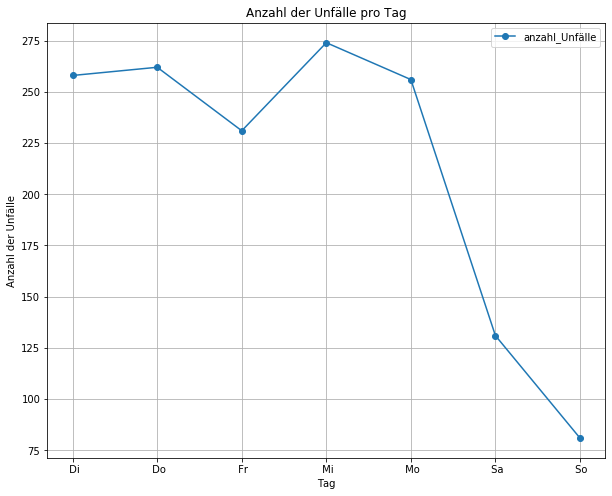

In [37]:
import matplotlib.pyplot as plt
df_day.set_index('WoTag', inplace=True)

df_day.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der Unfälle pro Tag')
plt.ylabel('Anzahl der Unfälle')
plt.xlabel('Tag')
plt.show();

##### Anzahl der Unfälle pro Monat

In [38]:
df_Monat=data.groupby('Monat').agg(anzahl_Unfälle=('Monat', 'count')).reset_index()
df_Monat.head()

Monat  anzahl_Unfälle
0      1             123
1      2              95
2      3             105
3      4              98
4      5             117

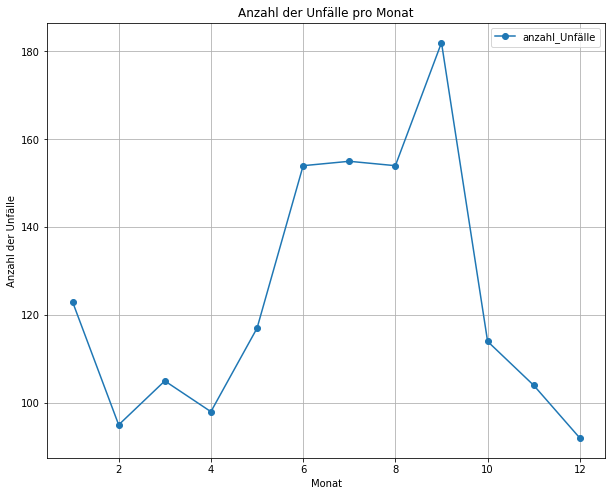

In [39]:
import matplotlib.pyplot as plt
df_Monat.set_index('Monat', inplace=True)

df_Monat.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der Unfälle pro Monat')
plt.ylabel('Anzahl der Unfälle')
plt.xlabel('Monat')
plt.show();

#### Anzahl der Unfälle pro Jahr

In [45]:
data.set_index('Datum', inplace=True)
df_year=data.index.year
data['year']=df_year
data.head()

LfNr    Zeit WoTag  Straßenklasse  Straßennummer  \
Datum                                                          
2019-01-01     1   01:53    Di              5            0.0   
2019-01-07     2   07:50    Mo              5            0.0   
2019-01-07     3   19:20    Mo              3          866.0   
2019-01-08     4   18:30    Di              5            0.0   
2019-01-09     5   09:05    Mi              5            0.0   

                     Gemeinde            Strasse  Tödlich verletzt  \
Datum                                                                
2019-01-01   Oldenburg (Oldb)      Bremer Straße                 0   
2019-01-07   Oldenburg (Oldb)    Huntemannstraße                 0   
2019-01-07   Oldenburg (Oldb)   Stedinger Straße                 0   
2019-01-08   Oldenburg (Oldb)         Rauhehorst                 0   
2019-01-09   Oldenburg (Oldb)        Donarstraße                 0   

            Schwer verletzt  Leichtverletzt  ...  Bet_02  Unfall-Typ  \
Datum                                        ...                       
2019-01-01                0             0.0  ...     PKW          EK   
2019-01-07                0             1.0  ...      RF          EK   
2019-01-07                0             1.0  ...       -          SO   
2019-01-08                0             1.0  ...      RF          EK   
2019-01-09                0             0.0  ...     PKW          RV   

             Koord.x    Koord.y  Leicht verletzt  Anzahl Beteiligte  VU-Art  \
Datum                                                                         
2019-01-01  8.224273  53.130702              0.0                0.0     0.0   
2019-01-07  8.188205  53.139235              0.0                0.0     0.0   
2019-01-07  8.234091  53.137003              0.0                0.0     0.0   
2019-01-08  8.195803  53.158298              0.0                0.0     0.0   
2019-01-09  8.237245  53.149171              0.0                0.0     0.0   

            Unter-Typ  Fahrtrichtung  year  
Datum                                       
2019-01-01        0.0              0  2019  
2019-01-07        0.0              0  2019  
2019-01-07        0.0              0  2019  
2019-01-08        0.0              0  2019  
2019-01-09        0.0              0  2019  

[5 rows x 45 columns]

In [46]:
df_test=data.groupby('year').agg(anzahl_Fahrten=('year', 'count')).reset_index()
df_test.head()

year  anzahl_Fahrten
0  2019             622
1  2020             482
2  2021             389

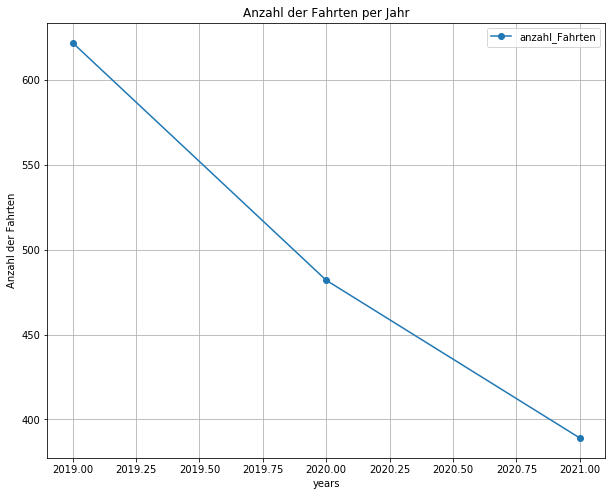

In [47]:
import matplotlib.pyplot as plt
df_test.set_index('year', inplace=True)

df_test.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der Fahrten per Jahr')
plt.ylabel('Anzahl der Fahrten')
plt.xlabel('years')
plt.show();

#### Anzahl der schwer verletze Unfälle

In [48]:
df_new= data[data['Schwer verletzt'] != 0]

In [49]:
df_new.head()

LfNr    Zeit WoTag  Straßenklasse  Straßennummer  \
Datum                                                          
2019-01-11    11   07:21    Fr              5            0.0   
2019-01-16    18   07:45    Mi              5            0.0   
2019-01-17    20   07:50    Do              5            0.0   
2019-01-18    25   11:55    Fr              5            0.0   
2019-01-19    26   10:40    Sa              5            0.0   

                     Gemeinde                  Strasse  Tödlich verletzt  \
Datum                                                                      
2019-01-11   Oldenburg (Oldb)            Amalienstraße                 0   
2019-01-16   Oldenburg (Oldb)        Bremer Heerstraße                 0   
2019-01-17   Oldenburg (Oldb)            Blücherstraße                 0   
2019-01-18   Oldenburg (Oldb)        Schützenhofstraße                 0   
2019-01-19   Oldenburg (Oldb)   Ammerländer Heerstraße                 0   

            Schwer verletzt  Leichtverletzt  ...  Bet_02  Unfall-Typ  \
Datum                                        ...                       
2019-01-11                1             0.0  ...      RF          AB   
2019-01-16                1             0.0  ...      FG          LV   
2019-01-17                1             0.0  ...      RF          EK   
2019-01-18                1             0.0  ...      RF          EK   
2019-01-19                1             1.0  ...      RF          SO   

             Koord.x    Koord.y  Leicht verletzt  Anzahl Beteiligte  VU-Art  \
Datum                                                                         
2019-01-11  8.222039  53.138940              0.0                0.0     0.0   
2019-01-16  8.230220  53.128729              0.0                0.0     0.0   
2019-01-17  8.184023  53.137671              0.0                0.0     0.0   
2019-01-18  8.224700  53.127933              0.0                0.0     0.0   
2019-01-19  8.168290  53.158602              0.0                0.0     0.0   

            Unter-Typ  Fahrtrichtung  year  
Datum                                       
2019-01-11        0.0              0  2019  
2019-01-16        0.0              0  2019  
2019-01-17        0.0              0  2019  
2019-01-18        0.0              0  2019  
2019-01-19        0.0              0  2019  

[5 rows x 45 columns]

In [50]:
df_M=df_new.groupby('Monat').agg(anzahl_schwerVerletzt=('Schwer verletzt', 'sum')).reset_index()
df_M

Monat  anzahl_schwerVerletzt
0       1                     13
1       2                      3
2       3                      8
3       4                      5
4       5                      9
5       6                     21
6       7                     12
7       8                     11
8       9                     15
9      10                     10
10     11                     12
11     12                      7

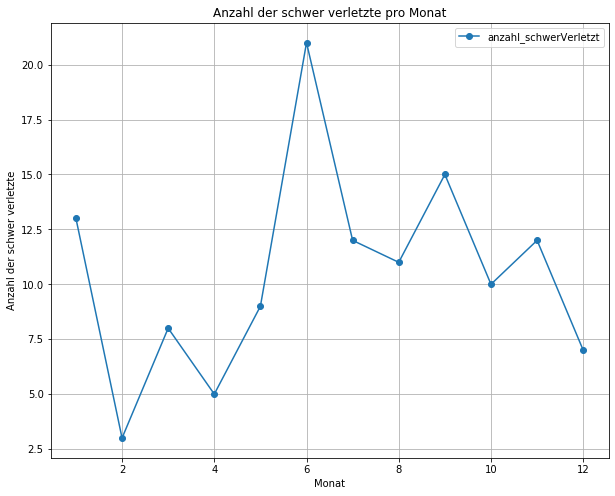

In [51]:
import matplotlib.pyplot as plt
df_M.set_index('Monat', inplace=True)

df_M.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der schwer verletzte pro Monat')
plt.ylabel('Anzahl der schwer verletzte')
plt.xlabel('Monat')
plt.show();

In [52]:
df_T=df_new.groupby('WoTag').agg(anzahl_schwerVerletzt=('Schwer verletzt', 'sum')).reset_index()
df_T.head()

WoTag  anzahl_schwerVerletzt
0    Di                     20
1    Do                     17
2    Fr                     23
3    Mi                     18
4    Mo                     20

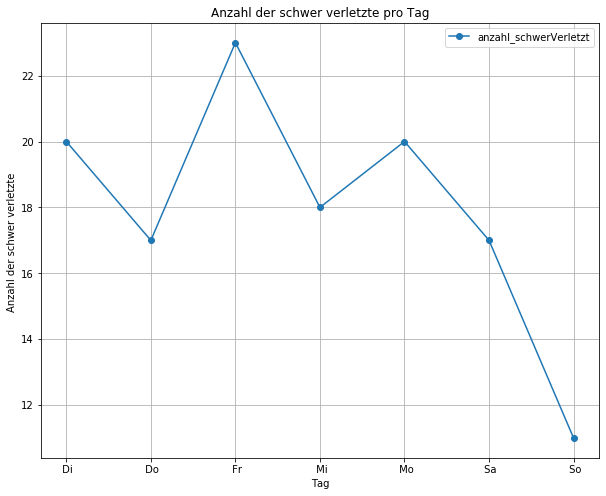

In [53]:
import matplotlib.pyplot as plt
df_T.set_index('WoTag', inplace=True)

df_T.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der schwer verletzte pro Tag')
plt.ylabel('Anzahl der schwer verletzte ')
plt.xlabel('Tag')
plt.show();

#### Anzahl der tödliche Unfälle

In [54]:
#df_new=data[['WoTag','Monat','Tödlich verletzt','Schwer verletzt']]

df2= data[data['Tödlich verletzt'] != 0]
df2.head()

LfNr    Zeit WoTag  Straßenklasse  Straßennummer  \
Datum                                                          
2019-01-22    30   08:20    Di              5            0.0   
2019-06-09   245   13:50    So              5            0.0   
2021-05-06   114   17:58    Do              3          870.0   

                     Gemeinde                Strasse  Tödlich verletzt  \
Datum                                                                    
2019-01-22   Oldenburg (Oldb)      Schützenhofstraße                 1   
2019-06-09   Oldenburg (Oldb)      Niedersachsendamm                 1   
2021-05-06   Oldenburg (Oldb)   Cloppenburger Straße                 1   

            Schwer verletzt  Leichtverletzt  ...  Bet_02  Unfall-Typ  \
Datum                                        ...                       
2019-01-22                0             0.0  ...      RF          AB   
2019-06-09                0             0.0  ...       -           F   
2021-05-06                0             0.0  ...     BUS          EK   

             Koord.x    Koord.y  Leicht verletzt  Anzahl Beteiligte  VU-Art  \
Datum                                                                         
2019-01-22  8.226142  53.129721              0.0                0.0     0.0   
2019-06-09  8.215710  53.125551              0.0                0.0     0.0   
2021-05-06  8.219286  53.124065              0.0                2.0     5.0   

            Unter-Typ  Fahrtrichtung  year  
Datum                                       
2019-01-22        0.0              0  2019  
2019-06-09        0.0              0  2019  
2021-05-06      321.0              0  2021  

[3 rows x 45 columns]

#### Anzahl der leicht verletzte Unfälle

In [57]:
df_leicht= data.loc[(data['Leicht verletzt'] != 0) |( data['Leichtverletzt']!=0) ]
df_leicht

LfNr    Zeit WoTag  Straßenklasse  Straßennummer  \
Datum                                                          
2019-01-07     2   07:50    Mo              5            0.0   
2019-01-07     3   19:20    Mo              3          866.0   
2019-01-08     4   18:30    Di              5            0.0   
2019-01-09     6   10:25    Mi              5            0.0   
2019-01-09     7   15:45    Mi              5            0.0   
...          ...     ...   ...            ...            ...   
2021-10-14   383   10:00    Do              5            0.0   
2021-10-15   385   13:20    Fr              3          866.0   
2021-10-16   386   15:20    Sa              5            0.0   
2021-10-18   387   05:45    Mo              5            0.0   
2021-10-28   389   16:30    Do              5            0.0   

                     Gemeinde                  Strasse  Tödlich verletzt  \
Datum                                                                      
2019-01-07   Oldenburg (Oldb)          Huntemannstraße                 0   
2019-01-07   Oldenburg (Oldb)         Stedinger Straße                 0   
2019-01-08   Oldenburg (Oldb)               Rauhehorst                 0   
2019-01-09   Oldenburg (Oldb)   Ammerländer Heerstraße                 0   
2019-01-09   Oldenburg (Oldb)         Nadorster Straße                 0   
...                       ...                      ...               ...   
2021-10-14   Oldenburg (Oldb)            Bahnhofsallee                 0   
2021-10-15   Oldenburg (Oldb)         Stedinger Straße                 0   
2021-10-16   Oldenburg (Oldb)               Rauhehorst                 0   
2021-10-18   Oldenburg (Oldb)          Alexanderstraße                 0   
2021-10-28   Oldenburg (Oldb)            Hausbäker Weg                 0   

            Schwer verletzt  Leichtverletzt  ...  Bet_02  Unfall-Typ  \
Datum                                        ...                       
2019-01-07                0             1.0  ...      RF          EK   
2019-01-07                0             1.0  ...       -          SO   
2019-01-08                0             1.0  ...      RF          EK   
2019-01-09                0             1.0  ...     PKW          EK   
2019-01-09                0             1.0  ...      RF          EK   
...                     ...             ...  ...     ...         ...   
2021-10-14                0             0.0  ...      RF          EK   
2021-10-15                0             0.0  ...      RF          AB   
2021-10-16                0             0.0  ...      RF          EK   
2021-10-18                0             0.0  ...      RF          EK   
2021-10-28                0             0.0  ...       -          SO   

             Koord.x    Koord.y  Leicht verletzt  Anzahl Beteiligte  VU-Art  \
Datum                                                                         
2019-01-07  8.188205  53.139235              0.0                0.0     0.0   
2019-01-07  8.234091  53.137003              0.0                0.0     0.0   
2019-01-08  8.195803  53.158298              0.0                0.0     0.0   
2019-01-09  8.185035  53.147222              0.0                0.0     0.0   
2019-01-09  8.228805  53.168905              0.0                0.0     0.0   
...              ...        ...              ...                ...     ...   
2021-10-14  8.237293  53.117579              1.0                2.0     5.0   
2021-10-15  8.226118  53.134438              1.0                2.0     5.0   
2021-10-16  8.189050  53.164801              1.0                2.0     5.0   
2021-10-18  8.209208  53.156969              1.0                2.0     5.0   
2021-10-28  8.185374  53.127860              1.0                1.0     0.0   

            Unter-Typ  Fahrtrichtung  year  
Datum                                       
2019-01-07        0.0              0  2019  
2019-01-07        0.0              0  2019  
2019-01-08        0.0              0  2019  


In [72]:
df_L=df_leicht.groupby('Monat').agg(anzahl_LeichtVerletzt=('Leicht verletzt', 'sum'),anzahl_LeichtVerletzt19=('Leichtverletzt', 'sum')).reset_index()
df_L['Anzahl_Leicht']=df_L['anzahl_LeichtVerletzt']+df_L['anzahl_LeichtVerletzt19']
df_L=df_L.drop(['anzahl_LeichtVerletzt','anzahl_LeichtVerletzt19'], axis=1)
df_L

Monat  Anzahl_Leicht
0       1           82.0
1       2           67.0
2       3           70.0
3       4           69.0
4       5           88.0
5       6          100.0
6       7          112.0
7       8          116.0
8       9          137.0
9      10           70.0
10     11           68.0
11     12           62.0

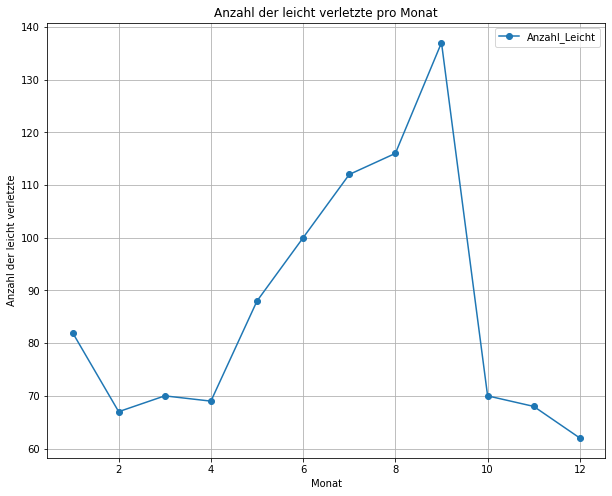

In [73]:
import matplotlib.pyplot as plt
df_L.set_index('Monat', inplace=True)

df_L.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der leicht verletzte pro Monat')
plt.ylabel('Anzahl der leicht verletzte')
plt.xlabel('Monat')
plt.show();

In [74]:
df_L=df_leicht.groupby('WoTag').agg(anzahl_LeichtVerletzt=('Leicht verletzt', 'sum'),anzahl_LeichtVerletzt19=('Leichtverletzt', 'sum')).reset_index()
df_L['Anzahl_Leicht']=df_L['anzahl_LeichtVerletzt']+df_L['anzahl_LeichtVerletzt19']
df_L=df_L.drop(['anzahl_LeichtVerletzt','anzahl_LeichtVerletzt19'], axis=1)
df_L

WoTag  Anzahl_Leicht
0    Di          183.0
1    Do          182.0
2    Fr          153.0
3    Mi          202.0
4    Mo          193.0
5    Sa           82.0
6    So           46.0

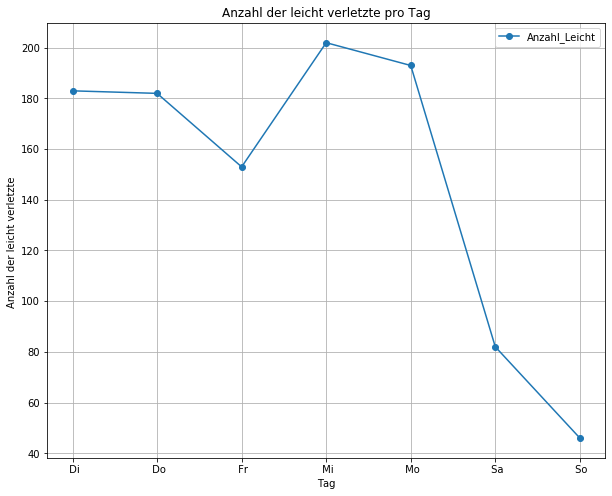

In [75]:
df_L.set_index('WoTag', inplace=True)

df_L.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der leicht verletzte pro Tag')
plt.ylabel('Anzahl der leicht verletzte ')
plt.xlabel('Tag')
plt.show();

#### Anzahl der Unfälle pro Typ

In [76]:
df_u=data[['Monat','WoTag','Unfall-Typ','Koord.x','Koord.y']]

In [77]:
df_u.head()

Monat WoTag Unfall-Typ   Koord.x    Koord.y
Datum                                                  
2019-01-01      1    Di         EK  8.224273  53.130702
2019-01-07      1    Mo         EK  8.188205  53.139235
2019-01-07      1    Mo         SO  8.234091  53.137003
2019-01-08      1    Di         EK  8.195803  53.158298
2019-01-09      1    Mi         RV  8.237245  53.149171

In [78]:
dff=df_u.groupby('Unfall-Typ').agg(anzahlUnfälle=('Unfall-Typ', 'count')).reset_index()
dff.head()

Unfall-Typ  anzahlUnfälle
0         AB            371
1         EK            611
2          F             14
3         LV            170
4         RV            150

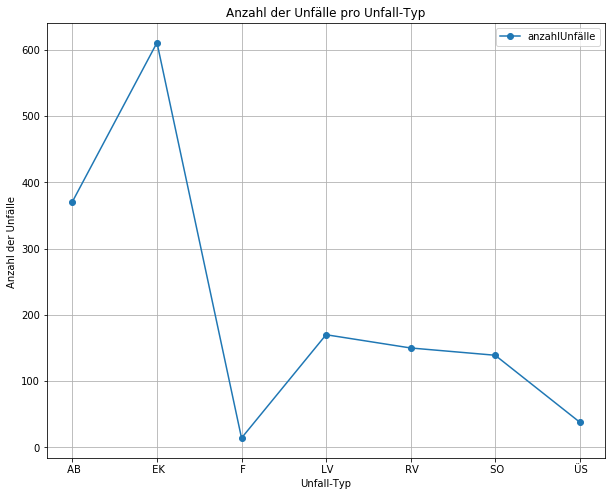

In [79]:
import matplotlib.pyplot as plt
dff.set_index('Unfall-Typ', inplace=True)

dff.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Anzahl der Unfälle pro Unfall-Typ')
plt.ylabel('Anzahl der Unfälle ')
plt.xlabel('Unfall-Typ')
plt.show();

In [80]:
groupby = ['Unfall-Typ','Monat']
df5=df_u.groupby(groupby).agg(anzahlUnfälle=('Unfall-Typ', 'count')).reset_index()
df5.head()

Unfall-Typ  Monat  anzahlUnfälle
0         AB      1             32
1         AB      2             21
2         AB      3             33
3         AB      4             28
4         AB      5             26

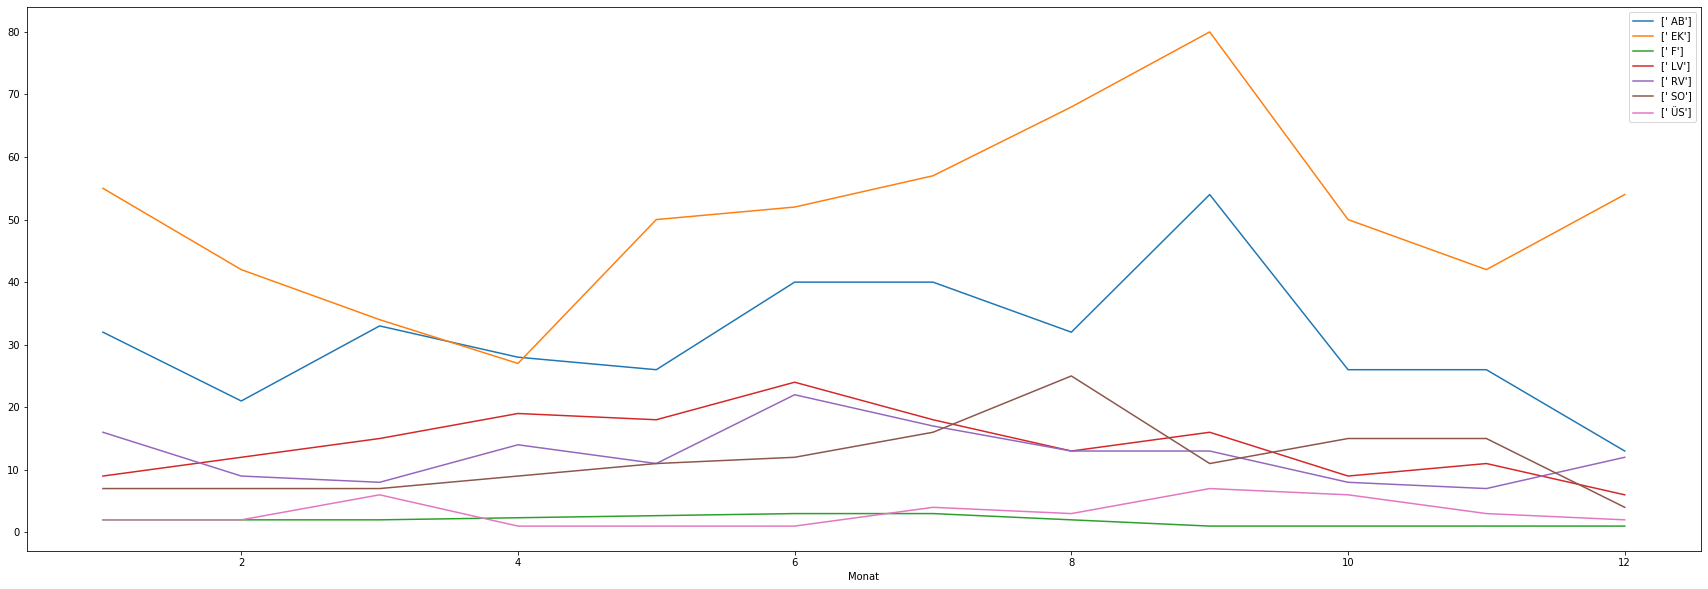

In [84]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [30, 10]

Typ = df5.groupby('Unfall-Typ')
typ=Typ['Unfall-Typ'].unique()
df5.groupby('Unfall-Typ').plot(x='Monat', y='anzahlUnfälle', ax=ax)
plt.legend(typ)
plt.show()

##### merge bicycle data with accident data

In [86]:
data1= pd.read_csv('CBC.csv')

In [87]:
data1=data1.drop('Unnamed: 0', axis=1)
data1

sex           method   tripId   latitude  longitude  precision  \
0           male          cycling  1828765  50.126219   8.767003  21.500000   
1           male          cycling  1828765  50.126173   8.766984   9.571000   
2           male          cycling  1828765  50.126173   8.766984   9.571000   
3           male          cycling  1828765  50.126106   8.766942   9.565000   
4           male          cycling  1828765  50.126166   8.766989  10.454000   
...          ...              ...      ...        ...        ...        ...   
10618287    male  electriccycling  1866491  53.160473   8.167035   5.000000   
10618288    male  electriccycling  1880481  51.562461   7.181191  39.111000   
10618289    male  electriccycling  1880481  51.562447   7.181188  13.891000   
10618290    male  electriccycling  1880481  51.562447   7.181188  13.891000   
10618291  female          cycling  1948635  53.270311   8.075318  20.941999   

                    timestamp  distance_Km  duration (s)  speed Km/h  
0         2021-05-31 22:27:03          NaN           NaN         NaN  
1         2021-05-31 22:27:12     0.005361           9.0    2.144476  
2         2021-05-31 22:27:13     0.000000           1.0    0.000000  
3         2021-05-31 22:27:34     0.008011          21.0    1.373354  
4         2021-05-31 22:27:56     0.007496          22.0    1.226619  
...                       ...          ...           ...         ...  
10618287  2021-07-05 10:35:04     0.000915           1.0    3.295311  
10618288  2021-07-21 15:50:41          NaN           NaN         NaN  
10618289  2021-07-21 15:51:07     0.001598          26.0    0.221264  
10618290  2021-07-21 15:51:08     0.000000           1.0    0.000000  
10618291  2021-09-30 19:48:27          NaN           NaN         NaN  

[10618292 rows x 10 columns]

In [88]:
import numpy as np
data1['distance']=np.nan

### calculate the distance between oldenburg and all the gps coordinates trips (not allowed to find the cities as before ) temporary solution

In [89]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lon1 = 8.197006
    lat1 = 53.192838
    lon2 = row['longitude']
    lat2 = row['latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

data1['distance'] = data1.apply(lambda row: haversine(row), axis=1)
data1.head()

sex   method   tripId   latitude  longitude  precision  \
0  male  cycling  1828765  50.126219   8.767003     21.500   
1  male  cycling  1828765  50.126173   8.766984      9.571   
2  male  cycling  1828765  50.126173   8.766984      9.571   
3  male  cycling  1828765  50.126106   8.766942      9.565   
4  male  cycling  1828765  50.126166   8.766989     10.454   

             timestamp  distance_Km  duration (s)  speed Km/h    distance  
0  2021-05-31 22:27:03          NaN           NaN         NaN  343.032982  
1  2021-05-31 22:27:12     0.005361           9.0    2.144476  343.037992  
2  2021-05-31 22:27:13     0.000000           1.0    0.000000  343.037992  
3  2021-05-31 22:27:34     0.008011          21.0    1.373354  343.045038  
4  2021-05-31 22:27:56     0.007496          22.0    1.226619  343.038735

In [90]:
data1['timestamp'] = pd.to_datetime(data1['timestamp'], format="%Y-%m-%d %H:%M:%S")

In [72]:
#df1=data1.groupby('tripId').agg(total_distance=('distance_Km', 'sum'),total_time=('timestamp', lambda x: x.max()-x.min())).reset_index()

In [74]:
#from datetime import datetime, timedelta
#df1['speed_average']=np.nan
#df1['total_time']=df1['total_time'].dt.total_seconds()

#df1['speed_average']=df1['total_distance']*3600/df1['total_time']
#df1

In [107]:
##less than 7km distance from oldenburg center
dfNew=data1.loc[(data1['distance'] < 7.0)]
dfNew

sex           method   tripId   latitude  longitude  precision  \
109583    female          cycling  1827328  53.192809   8.197054  47.583957   
109584    female          cycling  1827328  53.192838   8.197006  39.299339   
109585    female          cycling  1827328  53.192851   8.196991  32.593620   
109586    female          cycling  1827328  53.192878   8.197049  26.039742   
109587    female          cycling  1827328  53.192914   8.197061  19.862170   
...          ...              ...      ...        ...        ...        ...   
10618283    male  electriccycling  1866491  53.160448   8.166956   5.000000   
10618284    male  electriccycling  1866491  53.160455   8.166987   5.000000   
10618285    male  electriccycling  1866491  53.160459   8.167007   5.000000   
10618286    male  electriccycling  1866491  53.160469   8.167023   5.000000   
10618287    male  electriccycling  1866491  53.160473   8.167035   5.000000   

                   timestamp  distance_Km  duration (s)  speed Km/h  distance  
109583   2021-05-31 07:23:53          NaN           NaN         NaN  0.004539  
109584   2021-05-31 07:23:54     0.004541           1.0   16.348904  0.000000  
109585   2021-05-31 07:23:55     0.001757           1.0    6.326341  0.001756  
109586   2021-05-31 07:23:56     0.004893           1.0   17.615591  0.005287  
109587   2021-05-31 07:23:57     0.004082           1.0   14.695448  0.009205  
...                      ...          ...           ...         ...       ...  
10618283 2021-07-05 10:35:00     0.002761           1.0    9.939164  4.118365  
10618284 2021-07-05 10:35:01     0.002208           1.0    7.950526  4.116682  
10618285 2021-07-05 10:35:02     0.001406           1.0    5.060248  4.115646  
10618286 2021-07-05 10:35:03     0.001541           1.0    5.547181  4.114157  
10618287 2021-07-05 10:35:04     0.000915           1.0    3.295311  4.113381  

[3537257 rows x 11 columns]

In [108]:
len(dfNew['tripId'].unique())

5010

In [114]:
dfNew.set_index('timestamp', inplace=True)
index_month = dfNew.index.month
index_day = dfNew.index.day
dfNew['Monat']=index_month
dfNew['Tag']=index_day

In [115]:
dfNew=dfNew.reset_index('timestamp')

In [109]:
data2=data[['Strasse','Tag','Monat','Unfall-Typ','Koord.x','Koord.y']]

In [121]:
dataM=pd.merge(dfNew, data2, on=['Tag', 'Monat'], how='inner')

In [122]:
dataM

timestamp     sex   method   tripId   latitude  longitude  \
0        2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
1        2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
2        2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
3        2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
4        2021-05-31 07:23:54  female  cycling  1827328  53.192838   8.197006   
...                      ...     ...      ...      ...        ...        ...   
18662412 2021-09-01 06:21:16    male  cycling  1909883  53.131251   8.218959   
18662413 2021-09-01 06:21:16    male  cycling  1909883  53.131251   8.218959   
18662414 2021-09-01 06:21:16    male  cycling  1909883  53.131251   8.218959   
18662415 2021-09-01 06:21:16    male  cycling  1909883  53.131251   8.218959   
18662416 2021-09-01 06:21:16    male  cycling  1909883  53.131251   8.218959   

          precision  distance_Km  duration (s)  speed Km/h  distance  Monat  \
0         47.583957          NaN           NaN         NaN  0.004539      5   
1         47.583957          NaN           NaN         NaN  0.004539      5   
2         47.583957          NaN           NaN         NaN  0.004539      5   
3         47.583957          NaN           NaN         NaN  0.004539      5   
4         39.299339     0.004541           1.0   16.348904  0.000000      5   
...             ...          ...           ...         ...       ...    ...   
18662412   4.775962     0.005409           1.0   19.471367  6.998389      9   
18662413   4.775962     0.005409           1.0   19.471367  6.998389      9   
18662414   4.775962     0.005409           1.0   19.471367  6.998389      9   
18662415   4.775962     0.005409           1.0   19.471367  6.998389      9   
18662416   4.775962     0.005409           1.0   19.471367  6.998389      9   

          Tag             Strasse Unfall-Typ   Koord.x    Koord.y  
0          31            Brökerei         EK  8.176350  53.142191  
1          31       Am Tegelbusch         EK  8.166658  53.160422  
2          31         Pferdemarkt         AB  8.214674  53.146607  
3          31          Scheideweg         EK  8.208901  53.173004  
4          31            Brökerei         EK  8.176350  53.142191  
...       ...                 ...        ...       ...        ...  
18662412    1         Hauptstraße         EK  8.191453  53.133359  
18662413    1         Peterstraße         EK  8.209903  53.144535  
18662414    1     Alexanderstraße         ÜS  8.213531  53.149936  
18662415    1   Holler Landstraße         SO  8.256403  53.139137  
18662416    1     Elsässer Straße         AB  8.200579  53.151418  

[18662417 rows x 17 columns]

#### calculate the distance between the accident place and each gps coordinate of each trip

In [124]:
def haversine(row):
    lon1 = row['Koord.x']
    lat1 = row['Koord.y']
    lon2 = row['longitude']
    lat2 = row['latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

dataM['distance_unfall'] = dataM.apply(lambda row: haversine(row), axis=1)
dataM.head()

timestamp     sex   method   tripId   latitude  longitude  \
0 2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
1 2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
2 2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
3 2021-05-31 07:23:53  female  cycling  1827328  53.192809   8.197054   
4 2021-05-31 07:23:54  female  cycling  1827328  53.192838   8.197006   

   precision  distance_Km  duration (s)  speed Km/h  distance  Monat  Tag  \
0  47.583957          NaN           NaN         NaN  0.004539      5   31   
1  47.583957          NaN           NaN         NaN  0.004539      5   31   
2  47.583957          NaN           NaN         NaN  0.004539      5   31   
3  47.583957          NaN           NaN         NaN  0.004539      5   31   
4  39.299339     0.004541           1.0   16.348904  0.000000      5   31   

          Strasse Unfall-Typ   Koord.x    Koord.y  distance_unfall  
0        Brökerei         EK  8.176350  53.142191         5.791558  
1   Am Tegelbusch         EK  8.166658  53.160422         4.129323  
2     Pferdemarkt         AB  8.214674  53.146607         5.266657  
3      Scheideweg         EK  8.208901  53.173004         2.337964  
4        Brökerei         EK  8.176350  53.142191         5.793928

##### keep only the ones which are 100m away from the accident places

In [239]:
dfUnfall=dataM.loc[(dataM['distance_unfall']<0.1)]

In [240]:
### add a field for distance in meters just to see it clearly
dfUnfall['distance_Unfall_m']=dfUnfall['distance_unfall']*1000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [241]:
dfUnfall

timestamp     sex   method   tripId   latitude  longitude  \
4110     2021-05-31 07:43:23  female  cycling  1827328  53.147466   8.214309   
4114     2021-05-31 07:43:24  female  cycling  1827328  53.147405   8.214286   
4118     2021-05-31 07:43:25  female  cycling  1827328  53.147346   8.214252   
4122     2021-05-31 07:43:26  female  cycling  1827328  53.147287   8.214228   
4126     2021-05-31 07:43:27  female  cycling  1827328  53.147232   8.214187   
...                      ...     ...      ...      ...        ...        ...   
18651869 2021-09-01 07:25:52    male  cycling  1909672  53.168739   8.185232   
18651879 2021-09-01 07:25:52    male  cycling  1909672  53.168583   8.185002   
18651889 2021-09-01 07:25:52    male  cycling  1909672  53.168348   8.185346   
18651899 2021-09-01 07:25:52    male  cycling  1909672  53.168176   8.185562   
18651909 2021-09-01 07:25:52    male  cycling  1909672  53.167986   8.185723   

          precision  distance_Km  duration (s)  speed Km/h  distance  Monat  \
4110       4.731049     0.007417           1.0   26.701723  5.172035      5   
4114       4.732063     0.006954           1.0   25.035016  5.178302      5   
4118       4.732177     0.006941           1.0   24.988694  5.184193      5   
4122       4.732250     0.006753           1.0   24.310559  5.190233      5   
4126       4.731156     0.006699           1.0   24.116932  5.195592      5   
...             ...          ...           ...         ...       ...    ...   
18651869   4.760000     0.027002           0.0         inf  2.790455      9   
18651879   4.280000     0.023163           0.0         inf  2.811433      9   
18651889   4.184000     0.034728           0.0         inf  2.830053      9   
18651899  13.977000     0.023983           0.0         inf  2.844590      9   
18651909  17.077000     0.023614           0.0         inf  2.862020      9   

          Tag       Strasse Unfall-Typ   Koord.x    Koord.y  distance_unfall  \
4110       31   Pferdemarkt         AB  8.214674  53.146607         0.098508   
4114       31   Pferdemarkt         AB  8.214674  53.146607         0.092371   
4118       31   Pferdemarkt         AB  8.214674  53.146607         0.086804   
4122       31   Pferdemarkt         AB  8.214674  53.146607         0.081201   
4126       31   Pferdemarkt         AB  8.214674  53.146607         0.076663   
...       ...           ...        ...       ...        ...              ...   
18651869    1      Brookweg         EK  8.185069  53.168635         0.015846   
18651879    1      Brookweg         EK  8.185069  53.168635         0.007329   
18651889    1      Brookweg         EK  8.185069  53.168635         0.036847   
18651899    1      Brookweg         EK  8.185069  53.168635         0.060711   
18651909    1      Brookweg         EK  8.185069  53.168635         0.084224   

          distance_Unfall_m  
4110              98.507521  
4114              92.371457  
4118              86.804356  
4122              81.201488  
4126              76.663364  
...                     ...  
18651869          15.846077  
18651879           7.328605  
18651889          36.846726  
18651899          60.710878  
18651909          84.224063  

[30046 rows x 19 columns]

In [242]:
dfUnfall.shape

(30046, 19)

In [243]:
len(dfUnfall['tripId'].unique())

907

In [244]:
df_U=dfUnfall[['tripId','speed Km/h', 'distance_Unfall_m','Tag','Monat','timestamp']]

In [245]:
df_U=df_U[~df_U.isin([np.nan, np.inf, -np.inf]).any(1)]

In [246]:
df_U=df_U.set_index('timestamp')
df_U['second']=df_U.index.second
df_U['int_speed']=df_U['speed Km/h'].round().astype(int)

In [247]:
df_U=df_U.reset_index('timestamp')

#### test for ine trip

In [267]:
df_U1=df_U.loc[(df_U['tripId']==1842102)]
df_U1.head(10)

timestamp   tripId  speed Km/h  distance_Unfall_m  Tag  Monat  \
20410 2021-06-10 16:50:33  1842102   26.233924          90.451583   10      6   
20411 2021-06-10 16:50:38  1842102   26.848523          53.655736   10      6   
20412 2021-06-10 16:50:43  1842102   10.132976          40.180350   10      6   
20413 2021-06-10 16:50:49  1842102    5.497858          31.222428   10      6   
20414 2021-06-10 16:50:54  1842102   12.807471          14.470200   10      6   
20415 2021-06-10 16:52:04  1842102    0.751119           0.205377   10      6   
20416 2021-06-10 16:52:09  1842102   17.076651          23.590944   10      6   
20417 2021-06-10 16:52:15  1842102   15.884247          50.042902   10      6   
20418 2021-06-10 16:52:20  1842102   25.526552          85.325424   10      6   

       second  int_speed  
20410      33         26  
20411      38         27  
20412      43         10  
20413      49          5  
20414      54         13  
20415       4          1  
20416       9         17  
20417      15         16  
20418      20         26

In [268]:
df_U1=df_U1.set_index('timestamp')
df_U1['second']=df_U1.index.second
df_U1['int_speed']=df_U1['speed Km/h'].round().astype(int)

In [269]:
df_U1=df_U1.reset_index('timestamp')

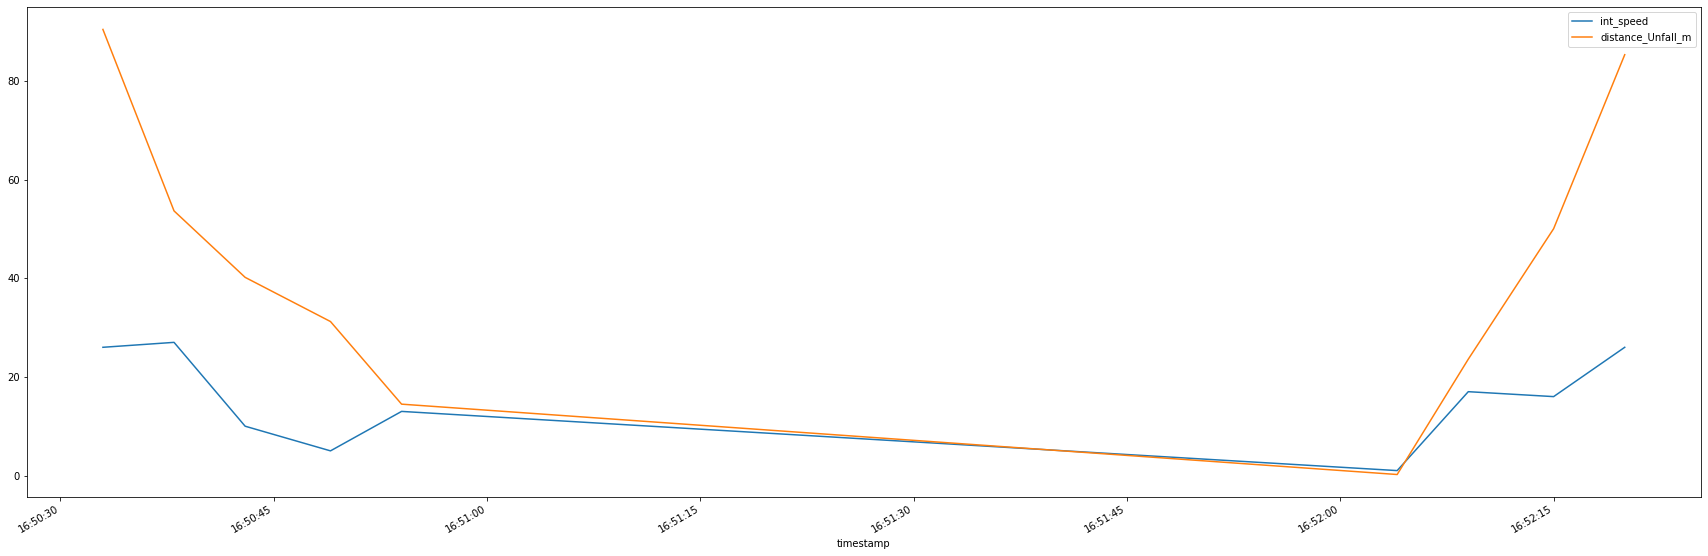

In [270]:
df_U1.plot(x="timestamp", y=["int_speed", "distance_Unfall_m"])
plt.show()